# TASK #2: MOUNT DRIVE AND IMPORT LIBRARIES/DATASETS

- In this case study, we want to classify images of traffic signs using deep Convolutional Neural Networks (CNNs).
- The dataset consists of 43 different classes of images. 
- Classes are as listed below: 
  - 0 = Speed limit (20km/h) 
  - 1 = Speed limit (30km/h)
  - 2 = Speed limit (50km/h) 
  - 3 = Speed limit (60km/h)
  - 4 = Speed limit (70km/h) 
  - 5 = Speed limit (80km/h)
  - 6 = End of speed limit (80km/h)
  - 7 = Speed limit (100km/h)
  - 8 = Speed limit (120km/h)
  - 9 = No passing
  - 10 = No passing for vehicles over 3.5 metric tons
  - 11 = Right-of-way at the next intersection
  - 12 = Priority road
  - 13 = Yield
  - 14 = Stop
  - 15 = No vehicles
  - 16 = Vehicles over 3.5 metric tons prohibited
  - 17 = No entry
  - 18 = General caution
  - 19 = Dangerous curve to the left
  - 20 = Dangerous curve to the right
  - 21 = Double curve
  - 22 = Bumpy road
  - 23 = Slippery road
  - 24 = Road narrows on the right
  - 25 = Road work
  - 26 = Traffic signals
  - 27 = Pedestrians
  - 28 = Children crossing 
  - 29 = Bicycles crossing
  - 30 = Beware of ice/snow
  - 31 = Wild animals crossing
  - 32 = End of all speed and passing limits
  - 33 = Turn right ahead
  - 34 = Turn left ahead
  - 35 = Ahead only
  - 36 = Go straight or right
  - 37 = Go straight or left
  - 38 = Keep right
  - 39 = Keep left
  - 40 = Roundabout mandatory
  - 41 = End of no passing
  - 42 = End of no passing by vehicles over 3.5 metric tons

- Citation
J. Stallkamp, M. Schlipsing, J. Salmen, and C. Igel. The German Traffic Sign Recognition Benchmark: A multi-class classification competition. In Proceedings of the IEEE International Joint Conference on Neural Networks, pages 1453–1460. 2011. 
@inproceedings{Stallkamp-IJCNN-2011, author = {Johannes Stallkamp and Marc Schlipsing and Jan Salmen and Christian Igel}, booktitle = {IEEE International Joint Conference on Neural Networks}, title = {The {G}erman {T}raffic {S}ign {R}ecognition {B}enchmark: A multi-class classification competition}, year = {2011}, pages = {1453--1460} }

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
import pandas as pd
import seaborn as sns
import pickle
import random

In [ ]:
import gzip

In [ ]:
!wget --load-cookies /tmp/cookies.txt "https://docs.google.com/uc?export=download&confirm=$(wget --quiet --save-cookies /tmp/cookies.txt --keep-session-cookies --no-check-certificate 'https://docs.google.com/uc?export=download&id=1tQ2HkQdxCUpAo4twbqN6mu7FYD7Ry5tq' -O- | sed -rn 's/.*confirm=([0-9A-Za-z_]+).*/\1\n/p')&id=1tQ2HkQdxCUpAo4twbqN6mu7FYD7Ry5tq" -O train.p && rm -rf /tmp/cookies.txt
!wget --no-check-certificate 'https://docs.google.com/uc?export=download&id=1zJxB1YzBYuImaHBSxWGN-ZXPDRYN_CTX' -O valid.p
!wget --no-check-certificate 'https://docs.google.com/uc?export=download&id=1jZhZpEZkYFaaPPAwfd1cB8e-FK0aoeC0' -O test.p

In [ ]:
with open("/content/train.p", mode='rb') as training_data:
    train = pickle.load(training_data)
with open("/content/valid.p", mode='rb') as validation_data:
    valid = pickle.load(validation_data)
with open("/content/test.p", mode='rb') as testing_data:
    test = pickle.load(testing_data)

In [ ]:
X_train, y_train = train['features'], train['labels']
X_validation, y_validation = valid['features'], valid['labels']
X_test, y_test = test['features'], test['labels']

In [ ]:
X_train.shape

In [ ]:
y_train.shape

In [ ]:
X_validation.shape

In [ ]:
y_validation.shape

In [ ]:
X_test.shape

In [ ]:
y_test.shape

# TASK #3: PERFROM IMAGES VISUALIZATION

In [ ]:
i = np.random.randint(1, len(X_train))
plt.imshow(X_train[i])
y_train[i]

In [ ]:
# Let's view more images in a grid format
# Define the dimensions of the plot grid 
W_grid = 5
L_grid = 5

# fig, axes = plt.subplots(L_grid, W_grid)
# subplot return the figure object and axes object
# we can use the axes object to plot specific figures at various locations

fig, axes = plt.subplots(L_grid, W_grid, figsize = (10,10))

axes = axes.ravel() # flaten the 15 x 15 matrix into 225 array

n_training = len(X_train) # get the length of the training dataset

# Select a random number from 0 to n_training
for i in np.arange(0, W_grid * L_grid): # create evenly spaces variables 

    # Select a random number
    index = np.random.randint(0, n_training)
    # read and display an image with the selected index    
    axes[i].imshow( X_train[index])
    axes[i].set_title(y_train[index], fontsize = 15)
    axes[i].axis('off')

plt.subplots_adjust(hspace=0.4)

        

# TASK #4: CONVERT IMAGES TO GRAYSCALE AND PERFORM NORMALIZATION

In [ ]:
from sklearn.utils import shuffle
X_train, y_train = shuffle(X_train, y_train)

#Since its an RGB image, so it means that you have add r with g with b and then divide it by 3 to get your desired grayscale image. Its done in this way. If you have an color image like the image shown above and you want to convert it into grayscale using average method.

In [ ]:
X_train_gray = np.sum(X_train/3, axis = 3, keepdims = True)
X_test_gray = np.sum(X_test/3, axis = 3, keepdims = True)
X_validation_gray = np.sum(X_validation/3, axis = 3, keepdims = True)

In [ ]:
X_train_gray.shape


In [ ]:
X_test_gray.shape


In [ ]:
X_validation_gray.shape

In [ ]:
X_train_gray_norm = (X_train_gray - 128)/128
X_test_gray_norm = (X_test_gray - 128)/128
X_validation_gray_norm = (X_validation_gray - 128)/128

In [ ]:
i = random.randint(1, len(X_train_gray))
plt.imshow(X_train_gray[i].squeeze(), cmap = 'gray')
plt.figure()
plt.imshow(X_train[i])
plt.figure()
plt.imshow(X_train_gray_norm[i].squeeze(), cmap = 'gray')

#Building the model

#Use this space for coding

## Resnet

In [ ]:
from keras.applications.resnet50 import ResNet50
from keras.preprocessing import image
from keras.applications.resnet50 import preprocess_input, decode_predictions
from tensorflow.python.keras.models import Sequential
from tensorflow.python.keras.layers import Dense, Input
from keras.preprocessing.image import ImageDataGenerator

In [ ]:
from sklearn.preprocessing import OneHotEncoder

In [ ]:
resnet_50_model = ResNet50(weights='imagenet')

In [ ]:
resnet_50_model.summary()

In [ ]:
NUM_CLASSES = 43
CHANNELS = 3
IMAGE_RESIZE = 224
RESNET50_POOLING_AVERAGE = 'avg'
DENSE_LAYER_ACTIVATION = 'softmax'
OBJECTIVE_FUNCTION = 'categorical_crossentropy'

LOSS_METRICS = ['accuracy']
NUM_EPOCHS = 40
EARLY_STOP_PATIENCE = 3
STEPS_PER_EPOCH_TRAINING = 10
STEPS_PER_EPOCH_VALIDATION = 10

BATCH_SIZE_TRAINING = 100
BATCH_SIZE_VALIDATION = 100

In [ ]:
X_train.shape

In [ ]:
ResNet50(include_top = False, pooling = RESNET50_POOLING_AVERAGE, weights = "imagenet", input_shape=(32,32,3)).summary()

In [ ]:
custom_model = Sequential()
custom_model.add(ResNet50(include_top = False, pooling = RESNET50_POOLING_AVERAGE, weights = "imagenet", input_shape=(32,32,3)))
custom_model.add(Dense(NUM_CLASSES, activation = DENSE_LAYER_ACTIVATION))
#custom_model.layers[0].trainable = False

In [ ]:
custom_model.summary()

In [ ]:
custom_model.compile(optimizer = "adam", loss = OBJECTIVE_FUNCTION, metrics = LOSS_METRICS)

In [ ]:
from tensorflow.python.keras.callbacks import EarlyStopping, ModelCheckpoint

cb_early_stopper = EarlyStopping(monitor = 'val_loss', patience = EARLY_STOP_PATIENCE)
cb_checkpointer = ModelCheckpoint(filepath = 'best_resnet.hdf5', monitor = 'val_loss', save_best_only = True, mode = 'auto')

In [ ]:
image_size = IMAGE_RESIZE
#data_generator = ImageDataGenerator(preprocessing_function=preprocess_input)
X_train_transformed = preprocess_input(X_train) 

In [ ]:
X_train_transformed.shape

In [ ]:
ohe = OneHotEncoder(sparse=False)
y_train = y_train.reshape(-1,1)
y_train.shape
ohe.fit(y_train)
y_train_transformed = ohe.transform(y_train)

In [ ]:
y_validation = y_validation.reshape(-1,1)
y_test = y_test.reshape(-1,1)

In [ ]:
y_validation_transformed = ohe.transform(y_validation)
y_test_transformed = ohe.transform(y_test)

In [ ]:
y_train_transformed.shape

In [ ]:
X_validation_transformed = preprocess_input(X_validation)

In [ ]:
X_test_transformed = preprocess_input(X_test)

In [ ]:
fit_history = custom_model.fit(
        X_train_transformed, y_train_transformed,
        #steps_per_epoch=STEPS_PER_EPOCH_TRAINING,
        epochs = NUM_EPOCHS,
        validation_data=(X_validation_transformed, y_validation_transformed),
        #validation_steps=STEPS_PER_EPOCH_VALIDATION,
        callbacks=[cb_checkpointer, cb_early_stopper]
)

##Xception

In [ ]:
from keras.applications import Xception

In [ ]:
xception_custom_model = Sequential()
xception_custom_model.add(Xception(include_top=False, weights="imagenet", input_tensor=Input(shape=(32,32,3)), pooling="avg" ))
xception_custom_model.add(Dense(43, activation="softmax"))

In [ ]:
xception_custom_model.compile(optimizer = Adam(lr=0.001), loss = OBJECTIVE_FUNCTION, metrics = LOSS_METRICS)

In [ ]:
cb_early_stopper = EarlyStopping(monitor = 'val_loss', patience = EARLY_STOP_PATIENCE)
cb_checkpointer = ModelCheckpoint(filepath = 'best_xception.hdf5', monitor = 'val_loss', save_best_only = True, mode = 'auto')

In [ ]:
fit_history = xception_custom_model.fit(
        X_train_transformed, y_train_transformed,
        #steps_per_epoch=STEPS_PER_EPOCH_TRAINING,
        epochs = NUM_EPOCHS,
        validation_data=(X_validation_transformed, y_validation_transformed),
        #validation_steps=STEPS_PER_EPOCH_VALIDATION,
        callbacks=[cb_checkpointer, cb_early_stopper]
)

##VGGnet

In [ ]:
from keras.applications import VGG16
from keras.optimizers import Adam

In [ ]:
vgg_custom_model = Sequential()
vgg_custom_model.add(Xception(include_top=False, weights="imagenet", input_tensor=Input(shape=(32,32,3)), pooling="avg" ))
vgg_custom_model.add(Dense(43, activation="softmax"))

In [ ]:
vgg_custom_model.compile(optimizer = Adam(lr=0.001), loss = OBJECTIVE_FUNCTION, metrics = LOSS_METRICS)

In [ ]:
cb_early_stopper = EarlyStopping(monitor = 'val_loss', patience = EARLY_STOP_PATIENCE)
cb_checkpointer = ModelCheckpoint(filepath = 'best_vgg.hdf5', monitor = 'val_loss', save_best_only = True, mode = 'auto')

In [ ]:
fit_history = vgg_custom_model.fit(
        X_train_transformed, y_train_transformed,
        #steps_per_epoch=STEPS_PER_EPOCH_TRAINING,
        epochs = NUM_EPOCHS,
        validation_data=(X_validation_transformed, y_validation_transformed),
        #validation_steps=STEPS_PER_EPOCH_VALIDATION,
        callbacks=[cb_checkpointer, cb_early_stopper]
)

# TASK #8: ASSESS TRAINED CNN MODEL PERFORMANCE 

#Marks will be given on basis of next code cells results

In [ ]:
score = vgg_custom_model.evaluate(X_test_transformed, y_test_transformed)
print('Test Accuracy: {}'.format(score[1]))

In [ ]:
from keras.models import load_model

In [ ]:
best_vgg = load_model("best_vgg.hdf5")
best_vgg.summary()

In [ ]:
fscore = best_vgg.evaluate(X_test_transformed, y_test_transformed)
print('Test Accuracy: {}'.format(score[1]))

## Best Model Xception

In [ ]:
best_xception = load_model("best_xception.hdf5")
best_vgg.summary()

In [ ]:
fscore = best_xception.evaluate(X_test_transformed, y_test_transformed)
print('Test Accuracy: {}'.format(score[1]))

#Attach a screen shot of your results as proof below this cell

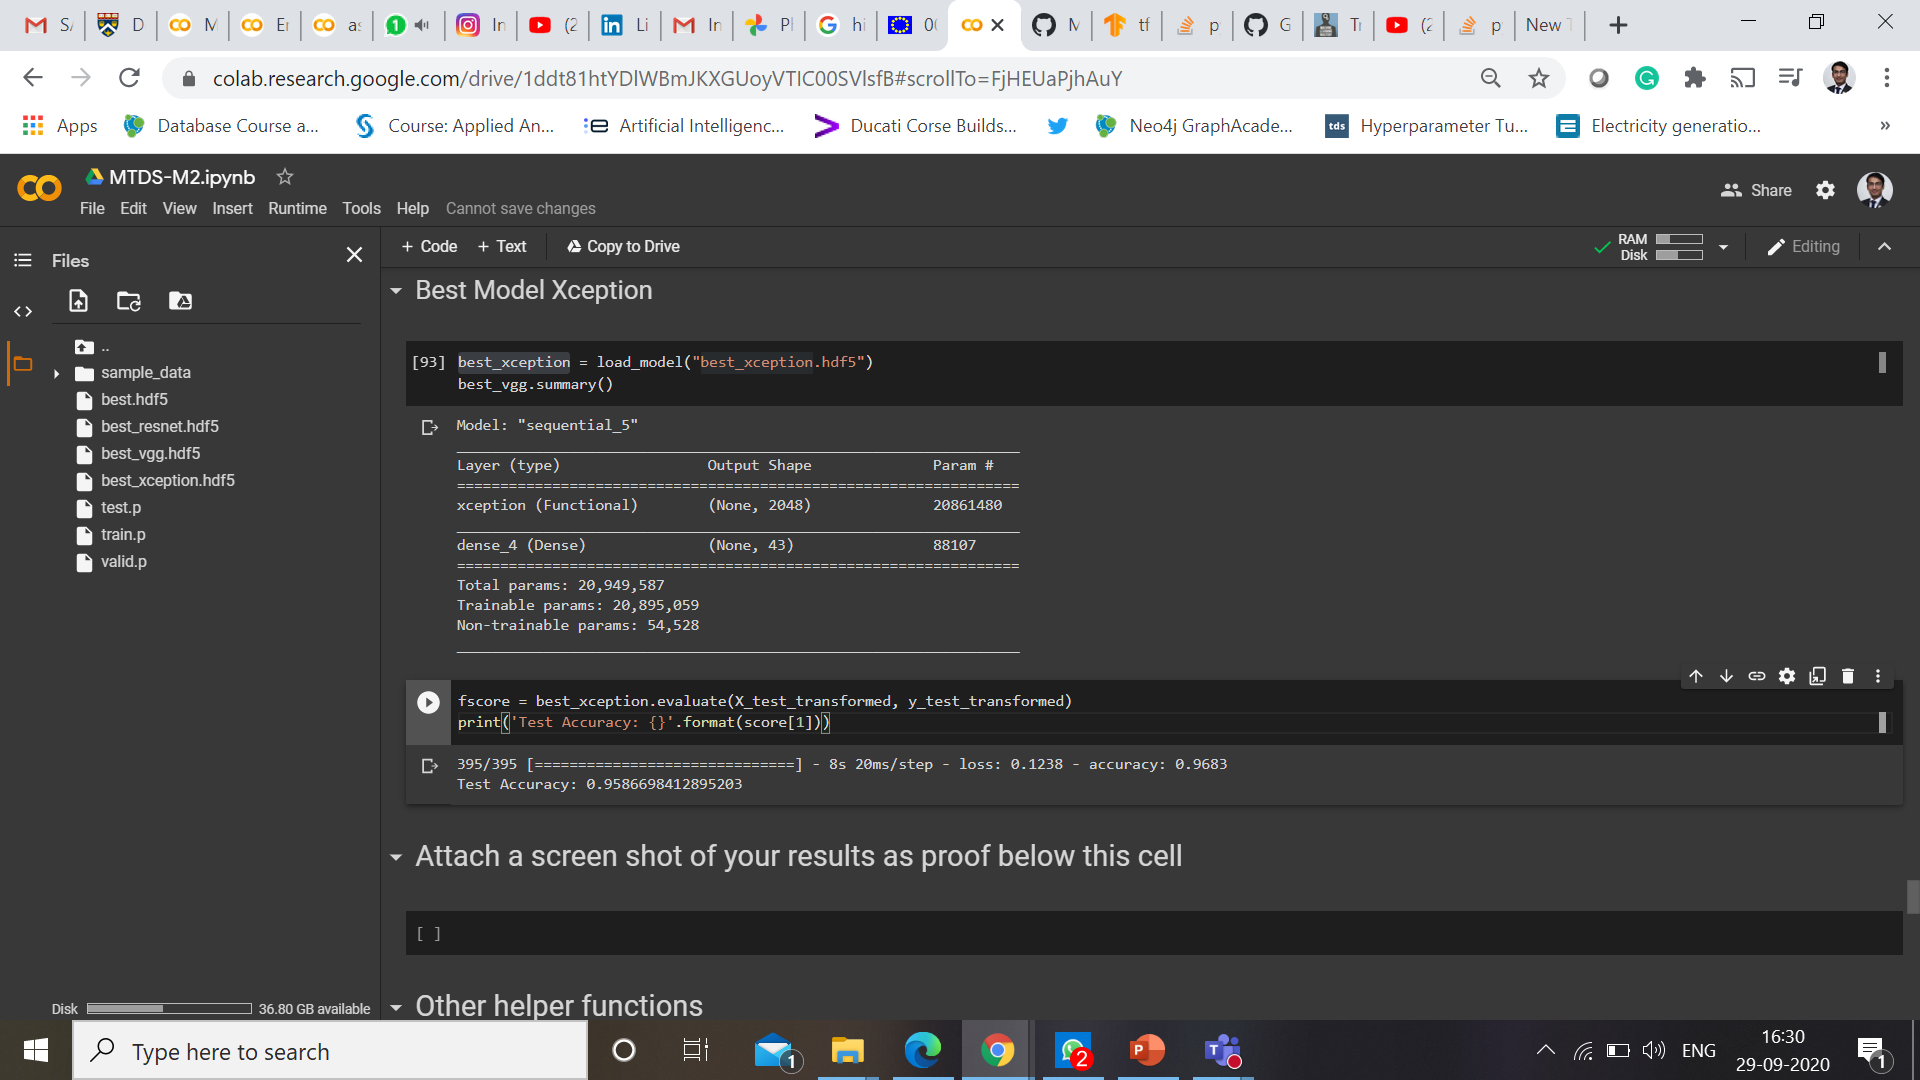

#Other helper functions

In [ ]:
fit_history.history.keys()

In [ ]:
accuracy = fit_history.history['accuracy']
val_accuracy = fit_history.history['val_accuracy']
loss = fit_history.history['loss']
val_loss = fit_history.history['val_loss']

In [ ]:
epochs = range(len(accuracy))

plt.plot(epochs, accuracy, 'bo', label='Training Accuracy')
plt.plot(epochs, val_accuracy, 'b', label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()

In [ ]:
plt.plot(epochs, loss, 'ro', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and Validation loss')
plt.legend()

In [ ]:
predicted_classes = CNN.predict_classes(X_test_gray_norm)
y_true = y_test

In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_true, predicted_classes)
plt.figure(figsize = (25, 25))
sns.heatmap(cm, annot = True)

In [ ]:
L = 5
W = 5

fig, axes = plt.subplots(L, W, figsize = (12, 12))
axes = axes.ravel()

for i in np.arange(0, L*W):
    axes[i].imshow(X_test[i])
    axes[i].set_title('Prediction = {}\n True = {}'.format(predicted_classes[i], y_true[i]))
    axes[i].axis('off')

plt.subplots_adjust(wspace = 1)    